In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150

In [2]:
import numpy as np
from itertools import product
import matplotlib.pyplot as pl
from sklearn.decomposition import FastICA

In [3]:
data = np.load("data/k2/dun/ktwo200000862_c0_p(0,0)_data.npy")[:, 20:30, 35:45]
pred = np.load("data/k2/dun/ktwo200000862_c0_p(0,0)_pre.npy")[:, 20:30, 35:45]

In [4]:
m = ~np.all(data == 0, axis=(1, 2))
data = data[m]
pred = pred[m]

In [5]:
diff = (data - pred) / pred

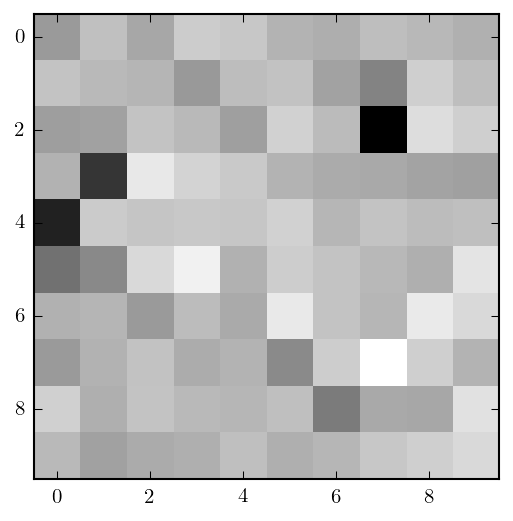

In [6]:
pl.imshow(diff[0], cmap="gray_r", interpolation="nearest");

In [7]:
block = diff.reshape((len(diff), -1))

In [8]:
model = FastICA(n_components=2)
model.fit(block.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=2, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [9]:
n = len(model.components_)
print(n)

2


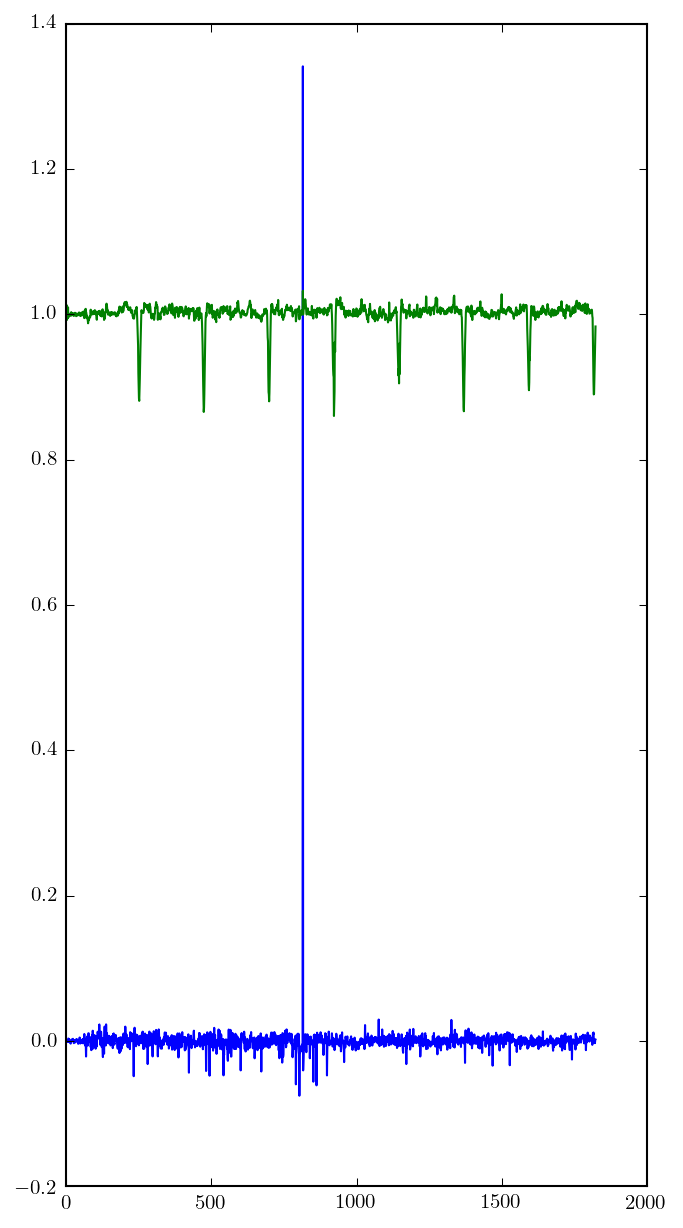

In [10]:
pl.figure(figsize=(5, 10))
pl.plot(model.components_.T + 1*np.arange(n));

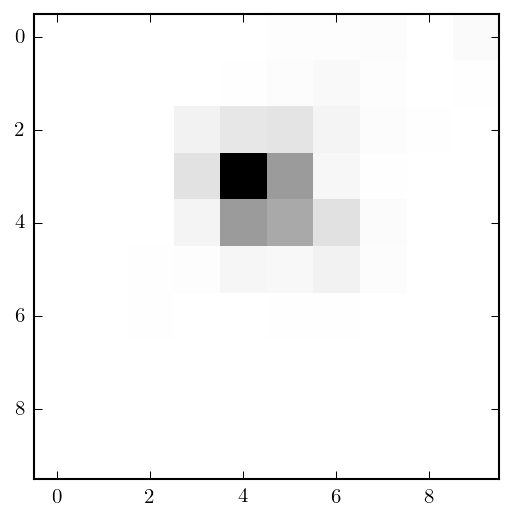

In [14]:
v = model.components_[1]
comp = np.abs((np.dot(v, block)).reshape(diff[0].shape))
pl.imshow(comp, cmap="gray_r", interpolation="nearest")

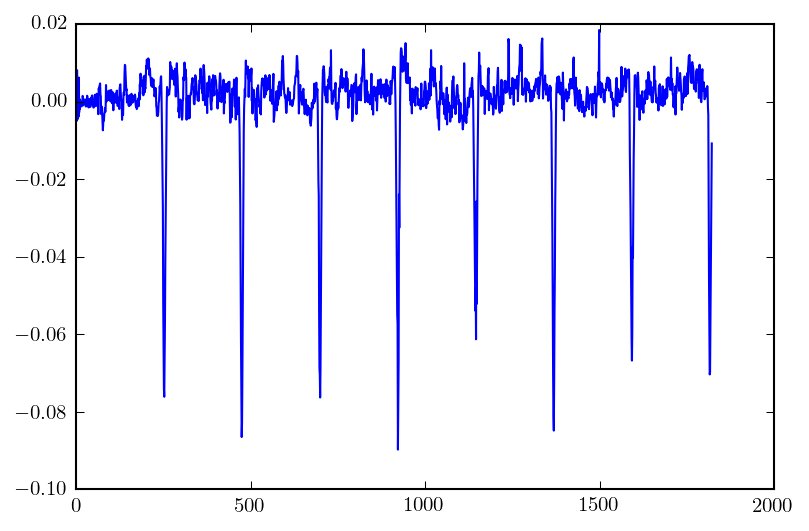

In [15]:
c = np.dot(v, block)
c /= np.sum(c)
pl.plot(np.sum(c * block, axis=1))

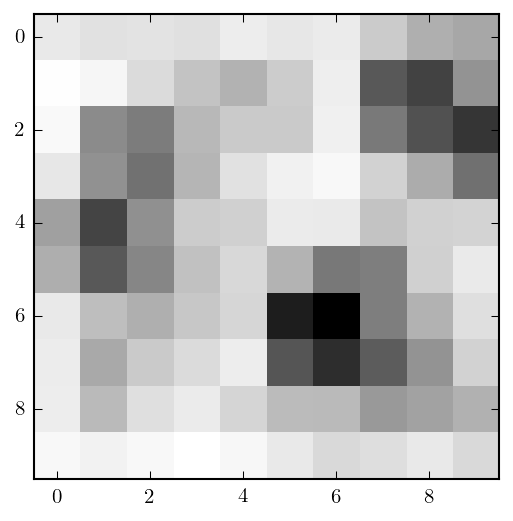

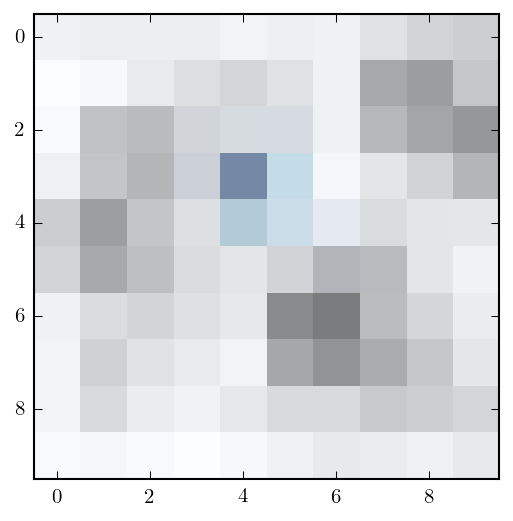

In [16]:
pl.figure()
pl.imshow(np.log(data[0]), cmap="gray_r", interpolation="nearest")
pl.figure()
pl.imshow(np.log(data[0]), cmap="gray_r", interpolation="nearest")
pl.imshow(comp, cmap="Blues", interpolation="nearest", alpha=0.5);